## Battery characterization: electroanalytical techniques

### EIS

Electrochemical impedance spectroscopy (EIS) is an electroanalytical method where a potential or current with a small amplitude perturbation is applied.

- The frequency ($\omega$) of this perturbation can be changed, to measure the resulting cell impedance (Z)

- The cell impedance (Z) is related to anything that restricts current flow: electrical resistances (poor connections, passivating films), interfacial capacitances, mass transfer of reactants, and reaction kinetics. 

- Batteries and other electrochemical cells can be treated, or modeled, as a combination of circuits (the electrolyte acts as a resistor, the electrode/electrolyte interface acts as a capacitor).

- The simplest unit is a resistor. The impedance of a resistor is: 

    Z = V/I = R  → This is a point on the Nyquist plot, which plots complex versus real impedance values at various values of frequency ($\omega$). 

    $Z_{real}$ = constant, $Z_{imag}$ = 0


- A capacitor is a vertical line on the y-axis. $Z_{real}\ =\ 0,\ Z_{imag}\ =\ \frac{1}{2\pi \omega C_d}$




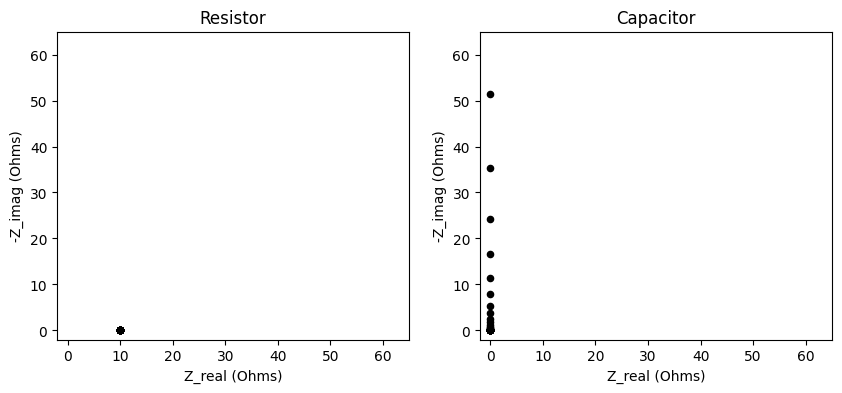

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

R_ohmic = 10
C_d = 0.1
R_ct = 50
omega = 0.01

w = 10**(np.linspace(np.log10(1E6),np.log10(0.01))) #sweep frequency from 1 MHz to 0.01 Hz
# Z_real = R_ohmic + (R_ct + omega*w**(-0.5))/((1+C_d*omega*w**0.5)**2+w**2*C_d**2*(R_ct + omega*w**-0.5)**2)
# Z_imag = (w*C_d*(R_ct+omega*w**-0.5)**2 + omega*w**-0.5*(w**0.5*C_d*omega + 1))/((1+w**0.5*C_d*omega)**2 + w**2*C_d**2*(R_ct + omega*w**-0.5)**2)
fig1 = plt.figure(figsize=(10,4))
ax1 = fig1.add_subplot(121)
ax2 = fig1.add_subplot(122)

for w in w:
    Z_real = R_ohmic 
    Z_imag = 0
    # Z_imag = (w*C_d*R_ct**2)/(1+w**2*C_d**2*R_ct**2)
    # Z_real = 5
    Z_imag_cap = 1/(2*np.pi*w*C_d)
    ax1.scatter(Z_real, Z_imag, color = 'k', s=20)
    ax2.scatter(0, Z_imag_cap, color = 'k', s=20)

ax1.set_xlabel('Z_real (Ohms)')
ax1.set_ylabel('-Z_imag (Ohms)')
ax1.set_xlim(-2, 65)
ax1.set_ylim(-2,65)
ax1.set_title('Resistor')

ax2.set_xlabel('Z_real (Ohms)')
ax2.set_ylabel('-Z_imag (Ohms)')
ax2.set_xlim(-2, 65)
ax2.set_ylim(-2,65)
ax2.set_title('Capacitor')

plt.show()

- A resistor and capacitor in series is a vertical line away from the y-axis. 
    $Z_{real}\ =\ 5,\ Z_{imag}\ =\ \frac{1}{2\pi \omega C_d}$

- A capacitor and resistor in parallel is a semicircle that starts at 0. This is now getting closer to the behavior of an electrochemical interface. 

- The EIS curve depicted represents the Nyquist plot of a simple circuit that represents an electrochemical interface. Assuming the electrochemistry is simple, the equivalent circuit is comprised of a resistor in series with a parallel capacitor/resistor. The lone resistance can be attributed to an ohmic resistance, and the parallel capacitor/resistor an electrochemical interface that has capacitance and a charge transfer resistance.

- A semicircle can be observed for a well behaved system, where the high frequency x-axis intercept is the ohmic resistance, and the diameter of the semicircle is the interfacial resistance. 

- In real systems such as batteries, EIS data generally gives a less-than-ideal semicircle due to the presence of many different interfaces. The charge transfer resistance can be estimated by modeling the semicircle. In real systems, the low frequency regime likely departs from the semicircle due to the influence of the Warburg impedance (diffusion processes). 

- EIS curves can be fit using equivalent circuit models. For instance, one could assume a resistor in series with a resistor + capacitor, and another resistor + capacitor. However, it is important to avoid over-fitting. 

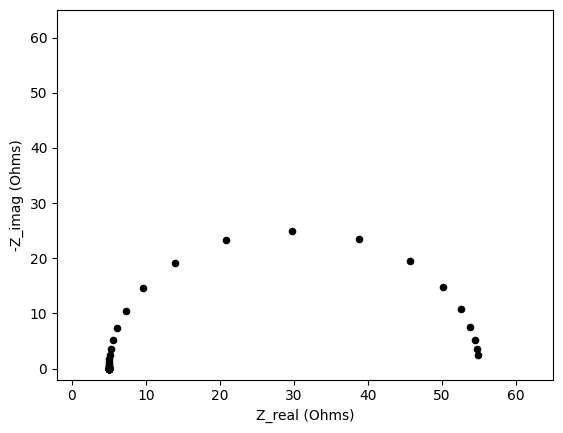

In [8]:
# Resistor and capacitor in parallel 

R_ohmic = 5
C_d = 0.1
R_ct = 50
omega = 0.01

w = 10**(np.linspace(np.log10(1E6),np.log10(0.01)))
# Z_real = R_ohmic + (R_ct + omega*w**(-0.5))/((1+C_d*omega*w**0.5)**2+w**2*C_d**2*(R_ct + omega*w**-0.5)**2)
# Z_imag = (w*C_d*(R_ct+omega*w**-0.5)**2 + omega*w**-0.5*(w**0.5*C_d*omega + 1))/((1+w**0.5*C_d*omega)**2 + w**2*C_d**2*(R_ct + omega*w**-0.5)**2)
fig1 = plt.figure()
ax1 = fig1.add_subplot(111)

for w in w:
    Z_real = R_ohmic + R_ct/(1+w**2*C_d**2*R_ct**2)
    Z_imag = (w*C_d*R_ct**2)/(1+w**2*C_d**2*R_ct**2)
    # Z_real = 5
    # Z_imag = 1/(2*np.pi*w*C_d)
    ax1.scatter(Z_real, Z_imag, color = 'k', s=20)

ax1.set_xlabel('Z_real (Ohms)')
ax1.set_ylabel('-Z_imag (Ohms)')
ax1.set_xlim(-2, 65)
ax1.set_ylim(-2,65)

plt.show()


In [10]:
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit
from impedance.models.circuits.fitting import extract_circuit_elements
from impedance.visualization import plot_nyquist,plot_residuals
import pandas as pd

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('./sample_EIS.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

print(Z)


[0.0494999 -0.0204387j  0.04776559-0.01828569j 0.04613582-0.01634316j
 0.04459684-0.01458917j 0.0431423 -0.01300096j 0.04181679-0.01157301j
 0.04060674-0.01028213j 0.03951932-0.00911337j 0.03856629-0.00804495j
 0.03773446-0.0070757j  0.03701391-0.00620994j 0.03639992-0.00545066j
 0.03588318-0.00480461j 0.03544781-0.00426302j 0.03506693-0.00381672j
 0.03472171-0.00346523j 0.03440366-0.00319362j 0.03410784-0.00298433j
 0.03382111-0.00284202j 0.03353617-0.00275108j 0.03325246-0.00270928j
 0.03295911-0.0027164j  0.03265643-0.0027688j  0.03232796-0.00286875j
 0.03197349-0.00299533j 0.03158436-0.00316339j 0.03106994-0.00343452j
 0.03046142-0.0036527j  0.02990071-0.00389595j 0.02937911-0.00414964j
 0.02861449-0.00435636j 0.02787738-0.00452851j 0.02705194-0.00462397j
 0.02622643-0.00463483j 0.02539678-0.00456254j 0.02467403-0.00441838j
 0.02398422-0.00421394j 0.02337619-0.0039762j  0.02279579-0.00372902j
 0.02229049-0.00355789j 0.02183348-0.00335096j 0.02142395-0.00318265j
 0.02104498-0.003050

In [11]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

circuit.fit(frequencies, Z)

Z_fit = circuit.predict(frequencies)


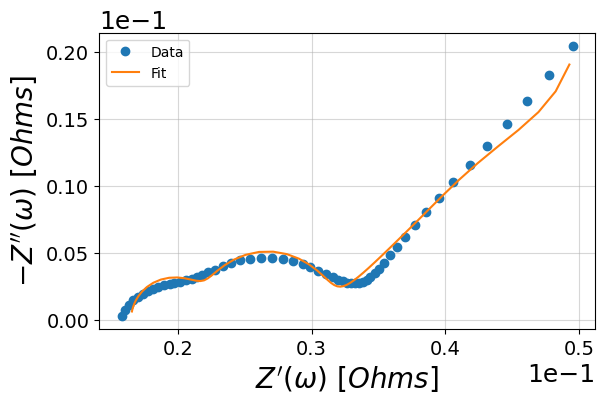

In [12]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

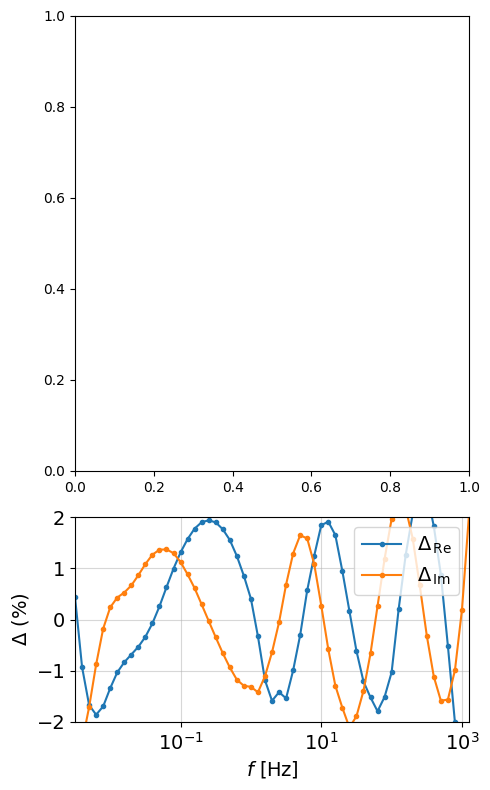

In [16]:
from impedance.visualization import plot_nyquist, plot_residuals
import numpy as np 

res_meas_real = (Z - circuit.predict(frequencies)).real/np.abs(Z)
res_meas_imag = (Z - circuit.predict(frequencies)).imag/np.abs(Z)
# Plot residuals
fig = plt.figure(figsize=(5,8))
gs = fig.add_gridspec(3, 1)
ax1 = fig.add_subplot(gs[:2,:])
ax2 = fig.add_subplot(gs[2,:])
plot_residuals(ax2, frequencies, res_meas_real, res_meas_imag, y_limits=(-2,2))

plt.tight_layout()
plt.show()

https://colab.research.google.com/gist/wesleykchang/444bbfdd0c6de19515740c2539412b95/eis_example.ipynb

### GITT (Galvanostatic intermittent titration technique)

GITT involves a series of current pulses and voltage relaxation steps to measure transient (i.e. immediate iR drop when current is turned off) and steady-state voltages (i.e. when cell rests and approaches equilibrium). Weppner and Huggins developed GITT in the 1970s for measuring solid state lithium ion diffusion coefficients. They used Li3Sb alloy as a test material, as it is a good approximation of one dimensional lithium ion diffusion into a bulk material, without phase transformations. After the cell voltage reached a steady-state value, current was pulsed to determine the effect on measured voltage (i.e. lithiate the electrode by a small amount and then measure how fast it takes the cell to reach equilibrium)

$D\ =\ \frac{4}{\pi}(\frac{m_B * V_m}{M_B*S})^2 (\frac{\Delta E_s}{\tau * dE/d\sqrt(t)})^2$

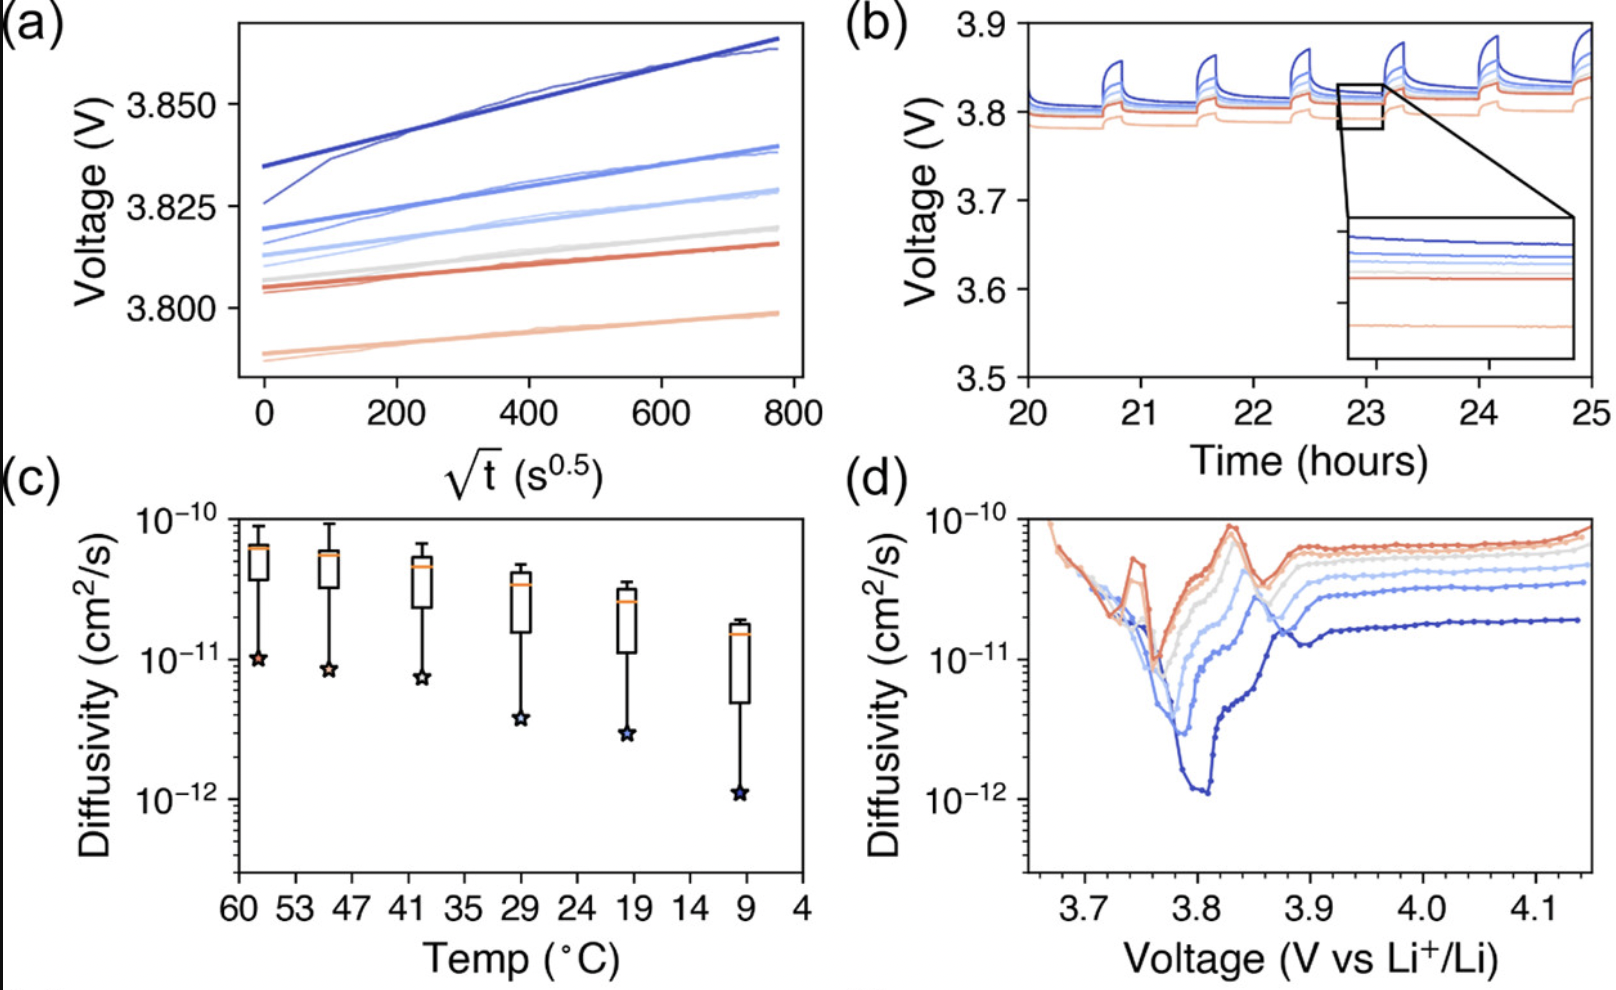

[Ref: https://pubs.acs.org/doi/full/10.1021/acs.jpcc.0c09972]

### dQ/dV 

Differential voltage or differential capacity analysis takes the derivative of the battery voltage curves. Peaks in the differential voltage corresponding to electrode phase changes. Peak shifting towards higher voltages on charge could indicate loss of lithium inventory, due to lithium plating, electrolyte decomposition. dQ/dV is a common battery analytical technique to quickly detect changes in battery state-of-health. 

### DST and HPPC for EV applications 

Automotive application sometimes requires more extensive testing of battery rate capability, as EV operation sometimes requires rapid changes in rate (fast acceleration). The dynamic stress test (DST) and hybrid pulse power characterization (HPPC) test are two common techniques used in the automotive industry to validate battery performance. These tests involve rapid discharge (and charge) pulses to determine how such pulses impact battery performance. The exact protocol was standardized by the USABC in the 2000s. 

DST profile is shown below, indicating how controlled power discharge pulses impact cell cycling. 


HPPC, as shown, is an extreme cycling protocol to determine the dynamic power capability over the entire voltage range. 
